## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## Solution

To analyze and visualize data, we must first be able to access it, so I will load the sales data first. Then i will explore the sales data, starting with looking at its first few rows

In [23]:
#import pandas
import pandas as pd
sales_data = pd.read_csv('data/sales_data.csv', parse_dates=['date'])
sales_data.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


To explore further, I will like to see how large the sales data is, if the fields provided are in the right data type(in other to ensure that analysis is not affected), and whether there are missing values. Some sanity check!

In [24]:
sales_data.shape
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


#Our data appears healthy for analysis. There are no mising values and the columns are in the appropriate data type. We proceed to answering the questions.


payment
Cash            19199.10
Credit card    110271.57
Transfer       159642.33
Name: total, dtype: float64


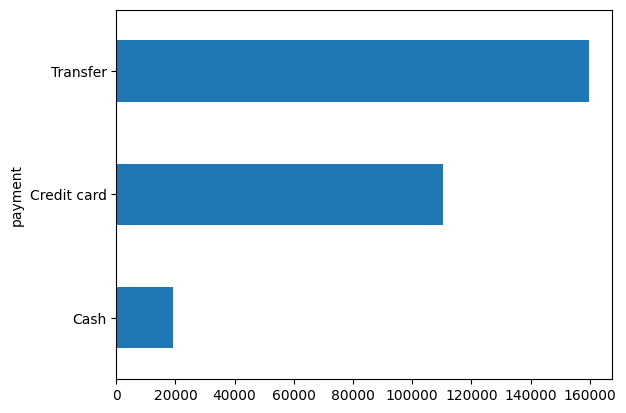

In [25]:
#What are the total sales for each payment method? plus plots to visualize the data
import matplotlib.pyplot as plt
total_sales_by_payment_method = sales_data.groupby('payment')['total'].sum()
print(total_sales_by_payment_method)
total_sales_by_payment_method.plot(kind='barh')
plt.show()


product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64


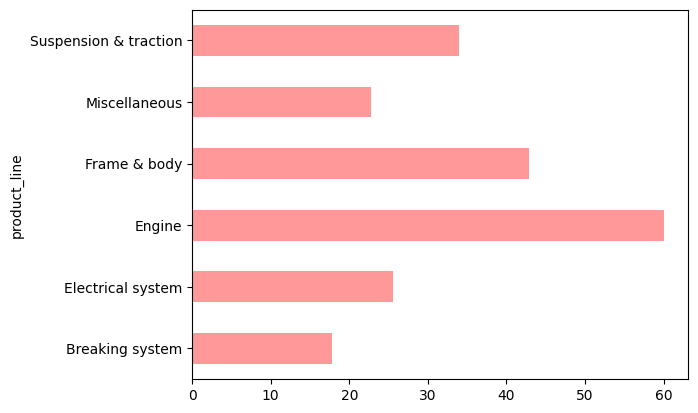

In [26]:
#What is the average unit price for each product line? plus plots to visualize the data
avg_unit_price_by_product_line = sales_data.groupby('product_line')['unit_price'].mean()
print(avg_unit_price_by_product_line)
avg_unit_price_by_product_line.plot(kind='barh', color='r', alpha=0.4)
plt.show()


client_type
Retail       167.058929
Wholesale    709.521467
Name: total, dtype: float64


<AxesSubplot:xlabel='client_type'>

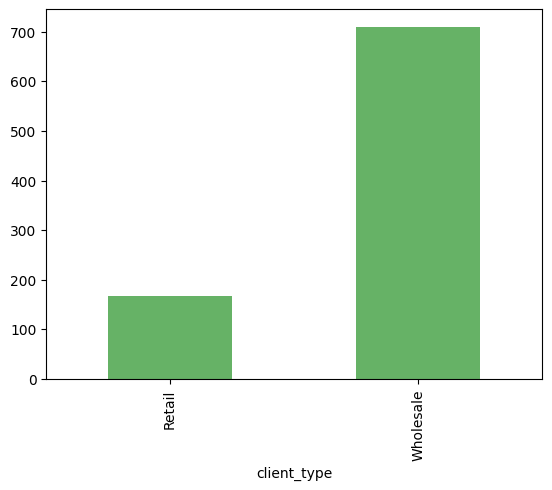

In [27]:
#average purchase value by client type

avg_pur_val_by_client_type = sales_data.groupby('client_type')['total'].mean()
print(avg_pur_val_by_client_type)
avg_pur_val_by_client_type.plot(kind="bar", color="g", alpha=0.6)


product_line
Breaking system          38350.15
Electrical system        43612.71
Engine                   37945.38
Frame & body             69024.73
Miscellaneous            27165.82
Suspension & traction    73014.21
Name: total, dtype: float64


<AxesSubplot:xlabel='product_line'>

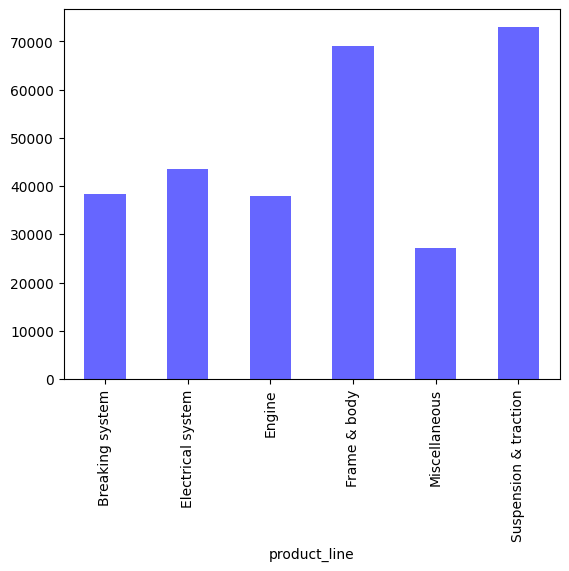

In [28]:
#total purchase value by product line.

total_pur_val_by_product_line = sales_data.groupby('product_line')['total'].sum()
print(total_pur_val_by_product_line)
total_pur_val_by_product_line.plot(kind="bar", color="b", alpha=0.6)


Summary of Findings. 

1. It appears that more clients prefer to pay for their purchases via transfer. Cash payment records the fewest number of clients. This could be an indication of more clients not liking to carry cash around, at least, not anymore

2. On average, Engine products are the most expensive motocycle sparepart products in the company's collections. 

3. Wholesale clients bring over 3x the purchase value that retail clients bring, on average.

4. While Engine products are the most expensive, Suspension & traction products actually offer the highest purchase value, with frame & body products following very closely.

#It was indeed a pleasure helping out my coleague.